In [2]:
from inspect_ai.log import read_eval_log
import pandas as pd

In [2]:
!ls logs

2025-01-14T16-03-40-08-00_math_JApEGDz4ANznuYJ5CoW3tP.eval
2025-01-14T16-04-10-08-00_math_jA2R7ZcJH8P4G84KMCEUHh.eval
2025-01-14T16-04-35-08-00_math_4qxtouAXS7mPyF2hJ6wUAv.eval
2025-01-14T17-24-28-08-00_math_jFHAJAQjz2ywKNFozQ7sXu.eval
2025-01-14T17-26-01-08-00_math_PxzpK6rneQYuG8o9zqrqRS.eval
2025-01-14T20-10-28-08-00_math_CCwgiAa482Y2ifKmwGAXTv.eval
2025-01-14T20-11-10-08-00_math_cEkAzz3NF8RCrhypooJhyt.eval
2025-01-14T20-38-39-08-00_math_ZYCsMHmQ8FRsTtkMLxHv5z.eval
2025-01-14T21-02-29-08-00_math_eMxJCLfWPz3ybt9qeenCtq.eval
2025-01-14T21-02-55-08-00_math_7UmL2v4zwg48oaTBc9vLpz.eval
2025-01-15T09-39-27-08-00_math_DuPEAcKtqEyMgH3WKLggRd.eval
2025-01-15T11-06-08-08-00_math_RPfzWPRVbh4ZANZ5bc7cYp.eval
2025-01-15T11-52-31-08-00_math_eoerwUmDYPzcZRJCtSwobS.eval


In [3]:
def load_scores(path):
    logs = read_eval_log(path)
    scores = []
    for sample in logs.samples:
        metadata = sample.metadata
        scores.append((metadata['level'], metadata['subject'], sample.scores['expression_equivalance'].value))
    
    df = pd.DataFrame(scores, columns=['level', 'subject', 'score'])
    df['score'] = df['score'].apply(lambda x: {'C': 1, 'I': 0}[x])
    return df

In [4]:
base_res = load_scores('logs/2025-01-15T11-52-31-08-00_math_eoerwUmDYPzcZRJCtSwobS.eval')
cot_res = load_scores('logs/2025-01-15T11-06-08-08-00_math_RPfzWPRVbh4ZANZ5bc7cYp.eval')
itc_res = load_scores('logs/2025-01-14T21-02-55-08-00_math_7UmL2v4zwg48oaTBc9vLpz.eval')

In [82]:
combined_df.level.dtype

dtype('O')

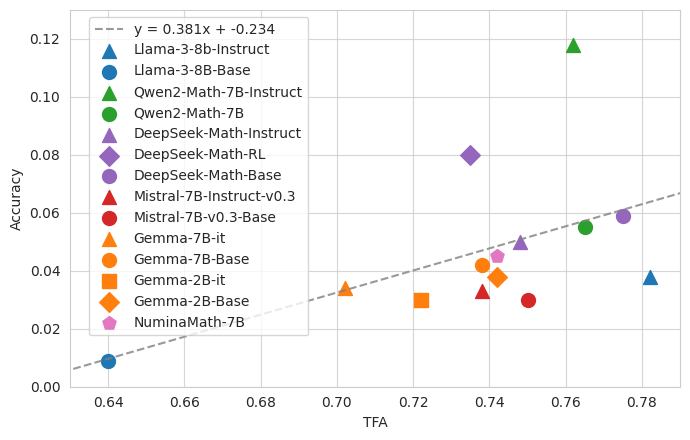

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = {
    'Llama-3-8b-Instruct': (0.782, 0.038),
    'Llama-3-8B-Base': (0.64, 0.009),
    'Qwen2-Math-7B-Instruct': (0.762, 0.118),
    'Qwen2-Math-7B': (0.765, 0.055),
    'DeepSeek-Math-Instruct': (0.748, 0.05),
    'DeepSeek-Math-RL': (0.735, 0.08),
    'DeepSeek-Math-Base': (0.775, 0.059),
    'Mistral-7B-Instruct-v0.3': (0.738, 0.033),
    'Mistral-7B-v0.3-Base': (0.75, 0.03),
    'Gemma-7B-it': (0.702, 0.034),
    'Gemma-7B-Base': (0.738, 0.042),
    'Gemma-2B-it': (0.722, 0.03),
    'Gemma-2B-Base': (0.742, 0.038),
    'NuminaMath-7B': (0.742, 0.045)
}

# Create the figure and axis with a larger size
plt.figure(figsize=(7, 4.5))

# Define colors for model families
model_families = ['Llama', 'Qwen', 'DeepSeek', 'Mistral', 'Gemma', 'Numina']
colors = ['#1f77b4', '#2ca02c', '#9467bd', '#d62728', '#ff7f0e', '#e377c2']

# Define marker mapping specifically for Gemma variants
gemma_markers = {
    'Gemma-7B-it': '^',      # triangle up
    'Gemma-7B-Base': 'o',    # circle
    'Gemma-2B-it': 's',      # square
    'Gemma-2B-Base': 'D',    # diamond
}

# Define markers for other model variants
default_markers = {
    'Base': 'o',          # circle
    'Instruct': '^',      # triangle up
    'RL': 'D',           # diamond
    'NuminaMath': 'p',   # pentagon
}

x_values = np.array([x for x, y in models.values()])
y_values = np.array([y for x, y in models.values()])
z = np.polyfit(x_values, y_values, 1)
p = np.poly1d(z)

# Plot the line of best fit
x_line = np.linspace(plt.xlim()[0], plt.xlim()[1], 100)
plt.plot(x_line, p(x_line), '--', color='gray', alpha=0.8, 
         label=f'y = {z[0]:.3f}x + {z[1]:.3f}')


# Plot each point
for model_name, (x, y) in models.items():
    # Determine which family this model belongs to
    family = next(fam for fam in model_families if fam.lower() in model_name.lower())
    color = colors[model_families.index(family)]
    
    # Determine marker style
    if 'Gemma' in model_name:
        marker = gemma_markers[model_name]
    else:
        # Find the first matching variant in the model name
        marker = next((mark for variant, mark in default_markers.items() 
                      if variant in model_name), 'o')
    
    plt.scatter(x, y, c=[color], marker=marker, s=100, label=model_name)

# Customize the plot
plt.grid(True, linestyle='-', alpha=0.8)
plt.xlabel('TFA')
plt.ylabel('Accuracy')

# Set axis limits
plt.xlim(0.63, 0.79)
plt.ylim(0.0, 0.13)

# Create legend with smaller font size and to the right of the plot
plt.legend(bbox_to_anchor=(0.02, 1), loc='upper left', fontsize=10)

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [1]:
import numpy as np

# Data points extracted from the plot (TFA, Accuracy)
data = [
    (0.64, 0.01),  # Gemma-2B-it
    (0.70, 0.035), # Gemma-7B-it
    (0.72, 0.03),  # Gemma-2B-Base
    (0.74, 0.043), # Llama-3-8b-Instruct
    (0.74, 0.05),  # NuminaMath-7B
    (0.75, 0.038), # Gemma-7B-Base
    (0.75, 0.05),  # DeepSeek-Math-Instruct
    (0.74, 0.08),  # DeepSeek-Math-RL
    (0.75, 0.03),  # Mistral-7B-v0.3-Base
    (0.76, 0.055), # Qwen2-Math-7B
    (0.77, 0.12),  # Qwen2-Math-7B-Instruct
    (0.78, 0.038), # Llama-3-8B-Base
    (0.78, 0.06)   # DeepSeek-Math-Base
]

# Split into x and y arrays
x = np.array([point[0] for point in data])
y = np.array([point[1] for point in data])

# Calculate the coefficients of the linear regression
slope, intercept = np.polyfit(x, y, 1)

# Calculate predicted y values
y_pred = slope * x + intercept

# Calculate R-squared
y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean) ** 2)  # Total sum of squares
ss_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
r_squared = 1 - (ss_res / ss_tot)

print(f"R² value: {r_squared:.4f}")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

R² value: 0.3100
Slope: 0.4048
Intercept: -0.2504


<Axes: xlabel='level', ylabel='score'>

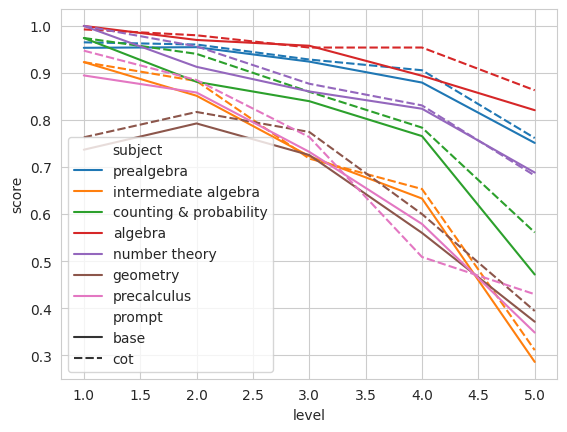

In [5]:
# plot all 3 on same graph
# x-axis: level
# y-axis: average score
# color: subject
# linestyle: model
import matplotlib.pyplot as plt
import seaborn as sns

# combined_df = pd.concat([base_res, cot_res, itc_res], keys=['base', 'cot', 'itc']).reset_index()
combined_df = pd.concat([cot_res, base_res], keys=['base', 'cot']).reset_index()

combined_df.level = combined_df.level.astype(int)

combined_df.rename(columns={'level_0': 'prompt'}, inplace=True)

sns.lineplot(data=combined_df, x='level', y='score', hue='subject', style='prompt', errorbar=None)

In [51]:
cot_res.groupby(['level', 'subject']).mean().unstack()

Index(['algebra', 'counting & probability', 'geometry', 'intermediate algebra',
       'number theory', 'prealgebra', 'precalculus'],
      dtype='object', name='subject')

In [3]:
logs = read_eval_log('logs/2025-01-15T11-52-31-08-00_math_eoerwUmDYPzcZRJCtSwobS.eval')

In [28]:
import pandas as pd

scores = []
for sample in logs.samples:
    metadata = sample.metadata
    scores.append((metadata['level'], metadata['subject'], sample.scores['expression_equivalance'].value))

df = pd.DataFrame(scores, columns=['level', 'subject', 'score'])
df['score'] = df['score'].apply(lambda x: {'C': 1, 'I': 0}[x])

<Axes: xlabel='level'>

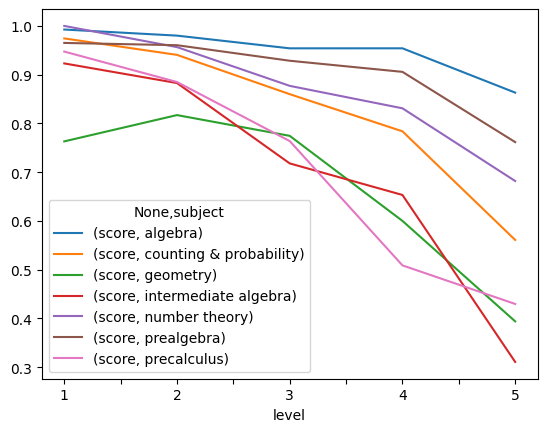

In [31]:
df.groupby(['level', 'subject']).mean().unstack().plot()

In [18]:
logs.samples[0].scores['expression_equivalance'].value

'C'

In [16]:
logs.results

EvalResults(total_samples=5000, completed_samples=5000, scores=[EvalScore(name='expression_equivalance', scorer='expression_equivalance', reducer=None, params={'model': None}, metrics={'accuracy': EvalMetric(name='accuracy', value=0.7876, options={}, metadata=None), 'stderr': EvalMetric(name='stderr', value=0.0057848025712341836, options={}, metadata=None)}, metadata=None), EvalScore(name='expression_exact_match', scorer='expression_exact_match', reducer='mean', params={}, metrics={'accuracy': EvalMetric(name='accuracy', value=0.0, options={}, metadata=None), 'stderr': EvalMetric(name='stderr', value=0.0, options={}, metadata=None)}, metadata=None), EvalScore(name='expression_exact_match_sympy', scorer='expression_exact_match_sympy', reducer='mean', params={}, metrics={'accuracy': EvalMetric(name='accuracy', value=0.0, options={}, metadata=None), 'stderr': EvalMetric(name='stderr', value=0.0, options={}, metadata=None)}, metadata=None)], metadata=None)